In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
out_dir = "./data/out"
optim_dir = os.path.join(out_dir,"simulated annealing")
res_dir = os.path.join(optim_dir, "white-box-22/DASH")

In [3]:
progress = pd.read_csv(os.path.join(res_dir, "progress.csv"))
progress.tail()

,temperature,curr value,best value,mean threshold worse acceptance
924,12.005425,106.269646,138.123032,0.000000
925,12.003768,106.269646,138.123032,0.000000
926,12.002114,106.269646,138.123032,0.000000
927,12.000462,117.662460,138.123032,0.000000
928,11.998812,106.561455,138.123032,0.553674


In [4]:
best_value_col_name = "best value"
curr_value_col_name = "curr value"
temperature_col_name = "temperature"

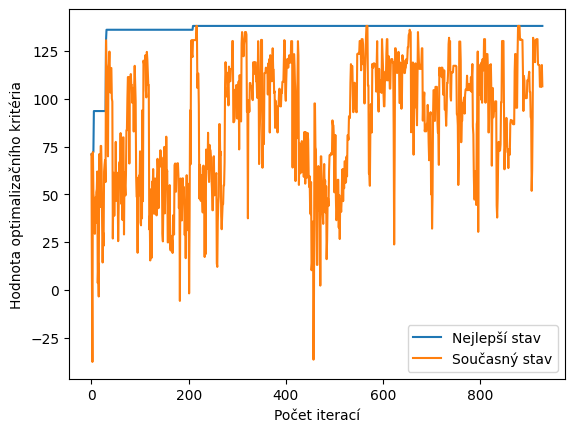

In [5]:
best_label = "Nejlepší stav"
curr_label = "Současný stav"

fig, ax = plt.subplots()
ax.plot(progress[best_value_col_name], label=best_label)
ax.plot(progress[curr_value_col_name], label=curr_label)
ax.set_xlabel("Počet iterací")
ax.set_ylabel("Hodnota optimalizačního kritéria");
ax.legend();

In [6]:
"""
progress_path = os.path.join(res_dir, "progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)
"""

'\nprogress_path = os.path.join(res_dir, "progress.png")\nfig.savefig(progress_path, bbox_inches=\'tight\', dpi=200)\n'

In [7]:
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib
def scatter_with_gaussian_kde(ax, x, y):
    # https://stackoverflow.com/a/20107592/3015186
    # Answer by Joel Kington

    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    ax.scatter(x, y, c=z, s=100)

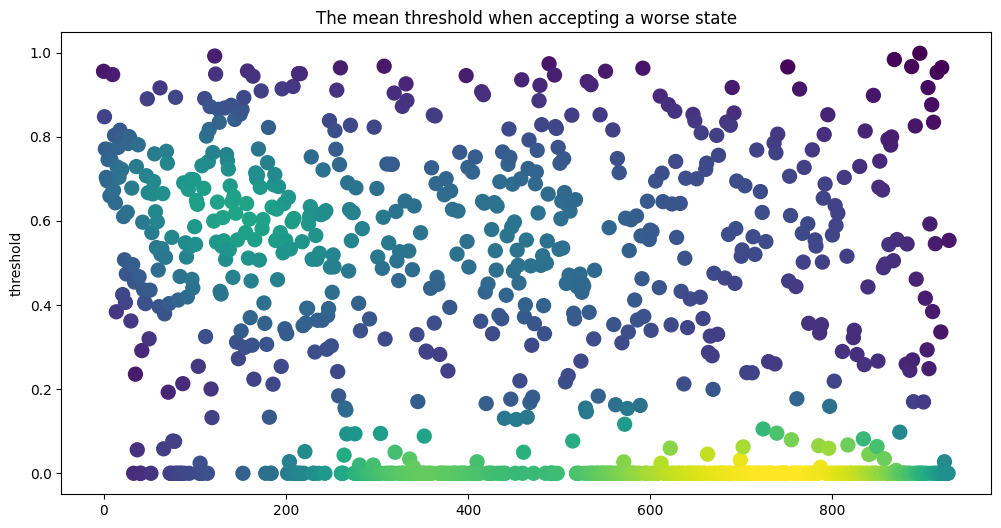

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
scatter_with_gaussian_kde(ax, progress.index, progress["mean threshold worse acceptance"])
ax.set_title("The mean threshold when accepting a worse state")
ax.set_ylabel("threshold");

In [9]:
"""
threshold_path = os.path.join(res_dir, "threshold.png")
fig.savefig(threshold_path, bbox_inches='tight', dpi=200)
"""

'\nthreshold_path = os.path.join(res_dir, "threshold.png")\nfig.savefig(threshold_path, bbox_inches=\'tight\', dpi=200)\n'